In [32]:
# download csv logfile

from paramiko import SSHClient,AutoAddPolicy
from scp import SCPClient

HOST = "192.168.1.24"
# HOST = "192.168.179.2"
PORT = "22"
USER = "robot"
PSWD = "maker"

ssh = SSHClient()
ssh.set_missing_host_key_policy(AutoAddPolicy())
ssh.connect(HOST, port=PORT, username=USER, password=PSWD)

scp = SCPClient(ssh.get_transport())

In [48]:
import pandas as pd

FILE_ID = "20190919003924" # ここに `Start time is <ID>` の<ID>を入れる
FILE_NAME = "log_%s_runner.csv" % FILE_ID

scp.get("/home/robot/src/log/%s" % FILE_NAME)

In [49]:
# =======================================================
# 表の出力
df = pd.read_csv("./%s" % FILE_NAME, encoding="UTF-8")
time_diff= df['時刻(sec)'].diff(1).fillna(0)
df.insert(2, '時刻差分(sec)', time_diff)
df

,id,時刻(sec),時刻差分(sec),処理時間(sec),ジャイロ角速度生値(deg/sec),モーター角度生値右(deg),モーター角度生値左(deg),モーター角度生値(deg),モーター角度(rad),ジャイロ推定角度(rad),...,モーター角速度目標,モーター角速度誤差(rad/sec),モーター角度誤差累積値(rad??),モーターPWM値目標左,モーターPWM値目標右,モーター電圧生値,推定最大入力可能電圧左,推定最大入力可能電圧右,モーターPWM値左,モーターPWM値右
0,0,0.020817,0.000000,0.020723,46,-2,-1,-1.5,-0.026180,0.016043,...,0.002400,-0.984148,-0.000525,4.966524,4.966524,7401666,0.0,0.0,-16.033476,25.966524
1,1,0.037120,0.016303,0.011498,46,-2,0,-1.0,-0.001410,0.032086,...,0.004790,0.924074,-0.000556,35.855899,35.855899,7560066,0.0,0.0,13.855899,57.855899
2,2,0.050795,0.013675,0.010604,54,-4,1,-1.5,0.005906,0.050920,...,0.007171,0.267179,-0.000443,34.403716,34.403716,7438066,0.0,0.0,12.403716,56.403716
3,3,0.065346,0.014551,0.010785,39,-5,4,-0.5,0.042194,0.064519,...,0.009543,1.351259,0.000391,48.674618,48.674618,7456133,0.0,0.0,31.674618,65.674618
4,4,0.079263,0.013917,0.010914,48,-4,8,2.0,0.099425,0.081258,...,0.011904,2.134277,0.002365,67.448374,67.448374,7395333,0.0,0.0,50.448374,84.448374
5,5,0.094158,0.014895,0.011300,20,-2,14,6.0,0.185978,0.088223,...,0.014257,3.231469,0.006065,76.627411,76.627411,7289333,0.0,0.0,59.627411,93.627411
6,6,0.108363,0.014205,0.010551,-10,2,21,11.5,0.288936,0.084717,...,0.016600,3.844338,0.011817,75.585630,75.585630,7262600,0.0,0.0,100.000000,11.585630
7,7,0.121830,0.013467,0.010686,-35,6,30,18.0,0.398876,0.072483,...,0.018933,4.103797,0.019760,68.623288,68.623288,7289066,0.0,0.0,100.000000,4.623288
8,8,0.135993,0.014163,0.010642,-33,15,36,25.5,0.517542,0.060948,...,0.021258,4.428725,0.030068,71.403694,71.403694,7332800,0.0,0.0,100.000000,7.403694
9,9,0.152873,0.016880,0.013690,-52,26,40,33.0,0.636907,0.042781,...,0.023573,4.452602,0.042754,61.153900,61.153900,7377600,0.0,0.0,100.000000,-38.846100


In [50]:
%matplotlib inline
import numpy as np

# グラフを表示する関数
def show_plot(df, columns, unit, figsize=(16,10), start=0, end=np.inf):
    x_column = "時刻(sec)"
    
    df_plot = df[(df[x_column] >= start) & (df[x_column] <= end)]
    df_max = df_plot.loc[:, columns].max(axis="index").max()
    df_min = df_plot.loc[:, columns].min(axis="index").min()
    time_max = df_plot[x_column].iloc[-1]
    
    yticks_posi = np.arange(0, df_max+unit, unit)
    yticks_nega = np.arange(0, df_min-unit, -unit)
    yticks = np.concatenate([yticks_posi, yticks_nega])
    
    sec = 10 #0.1
    xticks = np.arange(start, time_max, sec)

    df_plot.plot(y=columns,  x=x_column, yticks=yticks, xticks=xticks, figsize=figsize, grid=True)

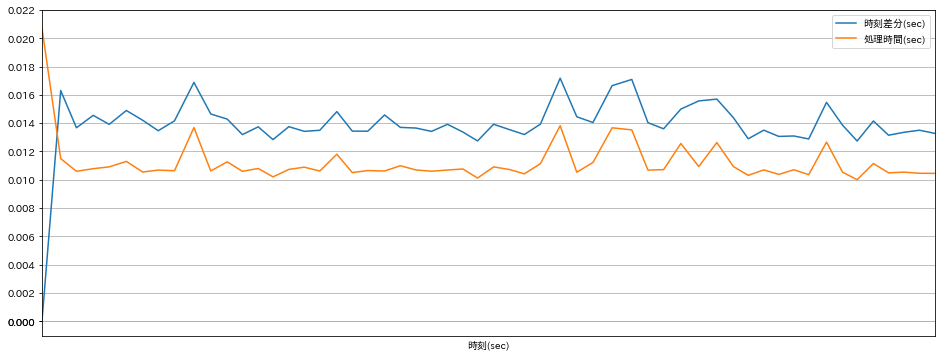

In [51]:
# =======================================================
# 処理時間と時刻差分のグラフの出力

columns_deg = [
    '時刻差分(sec)',
    '処理時間(sec)',
]
show_plot(df, columns_deg, 0.002, figsize=(16,6))

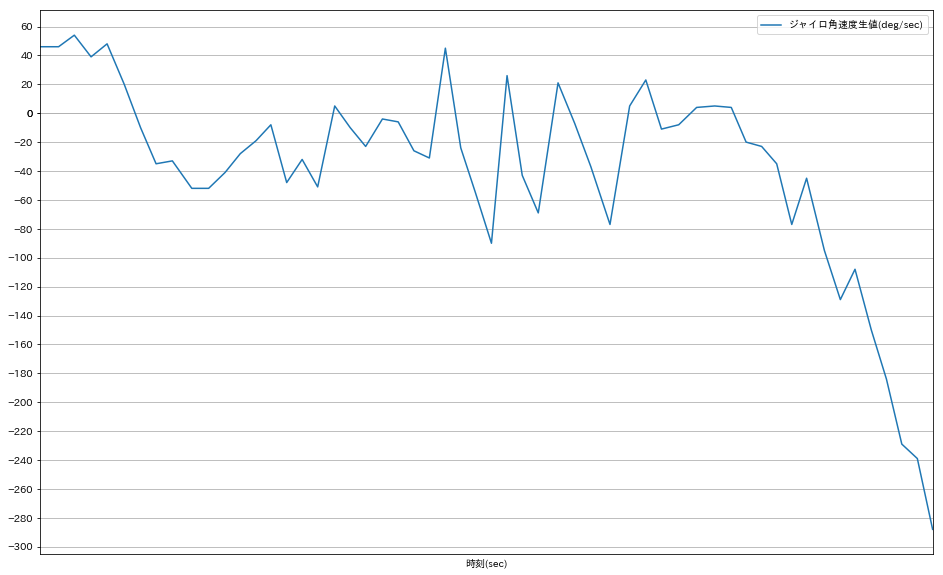

In [52]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'ジャイロ角速度生値(deg/sec)'
]
show_plot(df, columns_deg, 20, figsize=(16,10))

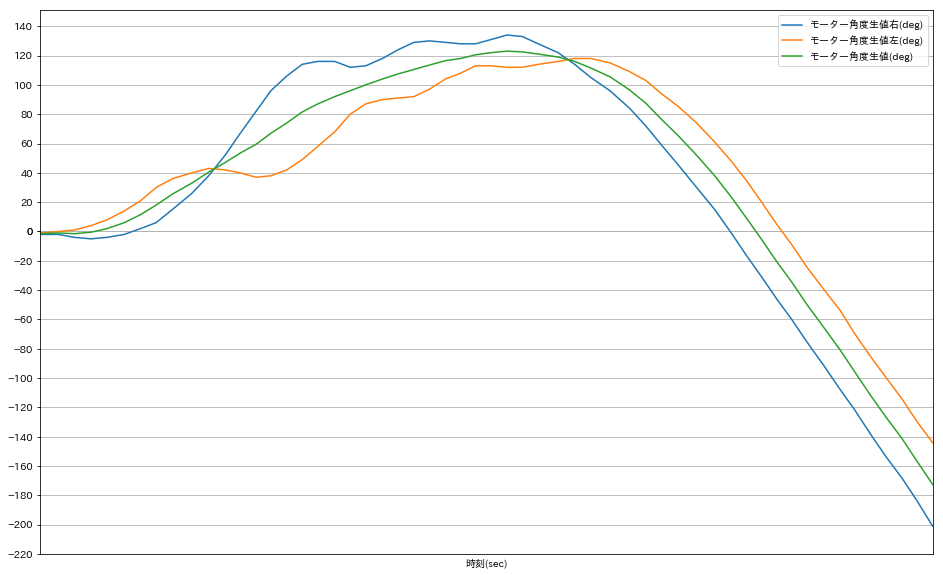

In [53]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'モーター角度生値右(deg)',
    'モーター角度生値左(deg)',
    'モーター角度生値(deg)'
]
show_plot(df, columns_deg, 20, figsize=(16,10))

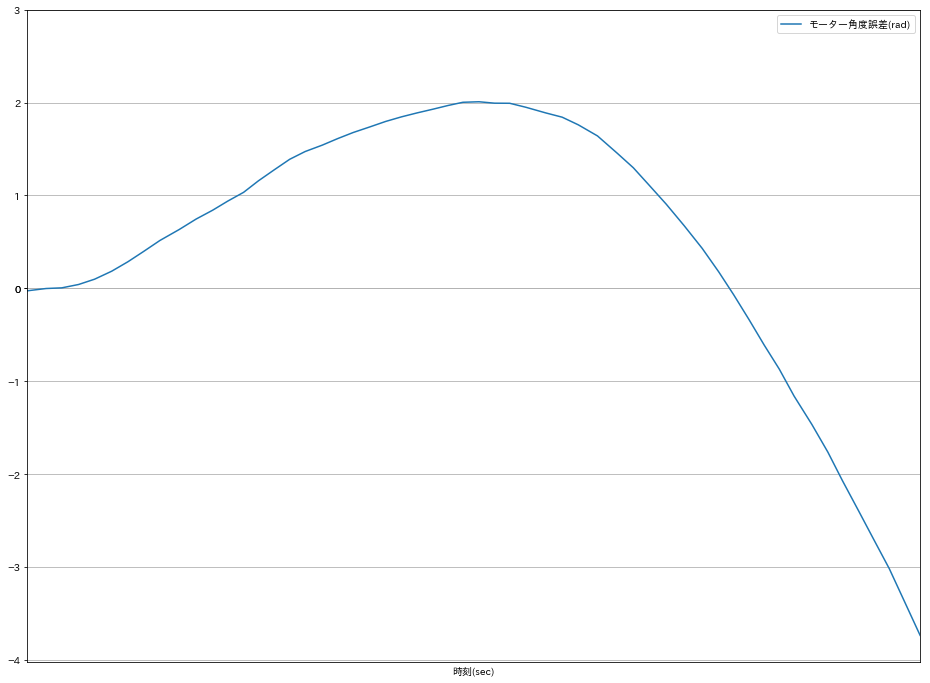

In [54]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差(rad)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

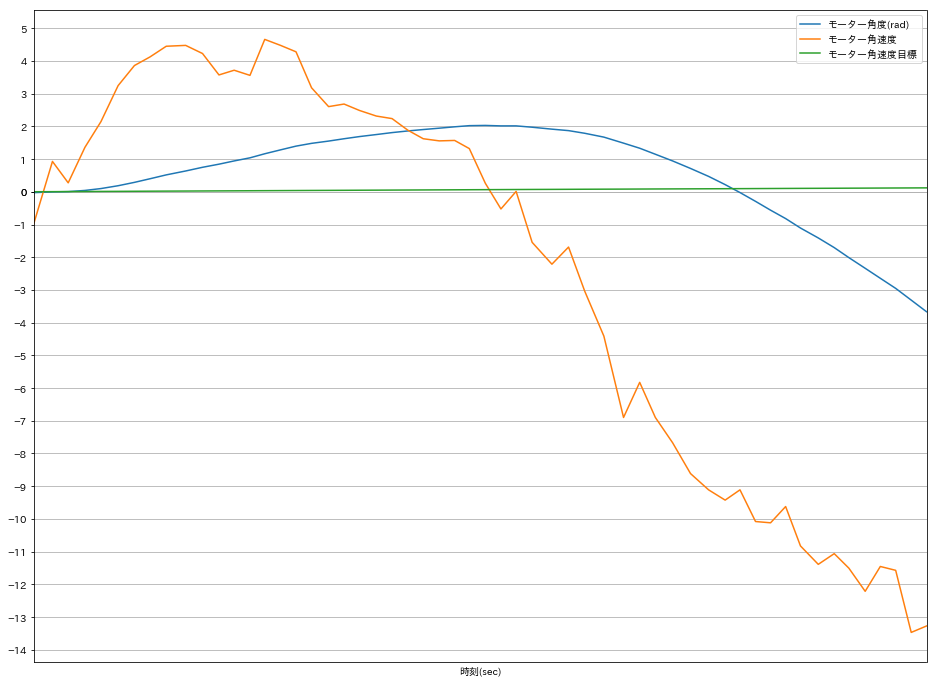

In [55]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度(rad)',
    'モーター角速度',
    'モーター角速度目標'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

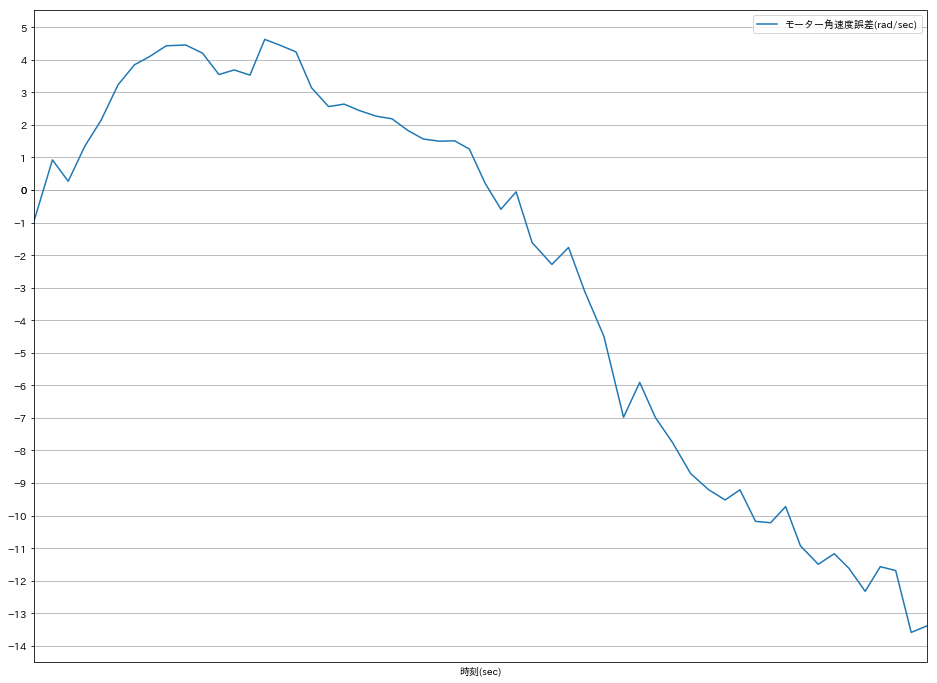

In [56]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角速度誤差(rad/sec)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

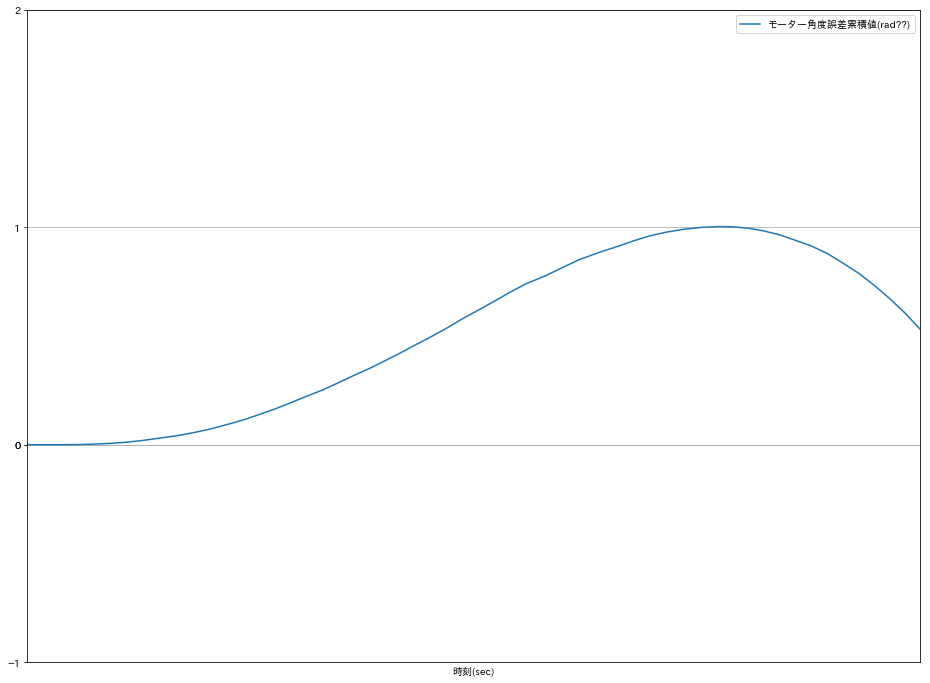

In [57]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差累積値(rad??)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

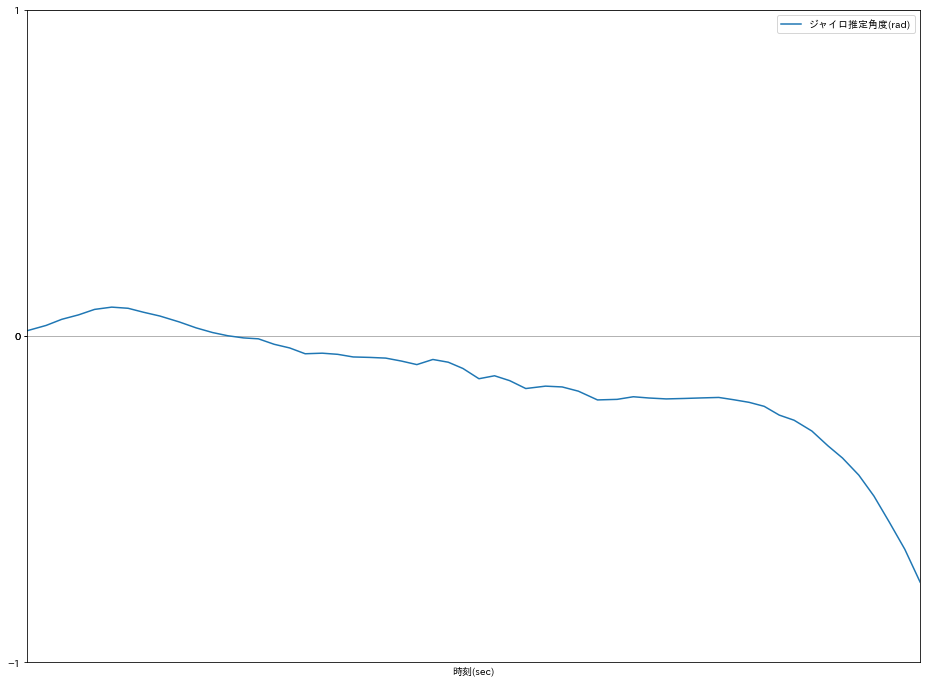

In [58]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角度(rad)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

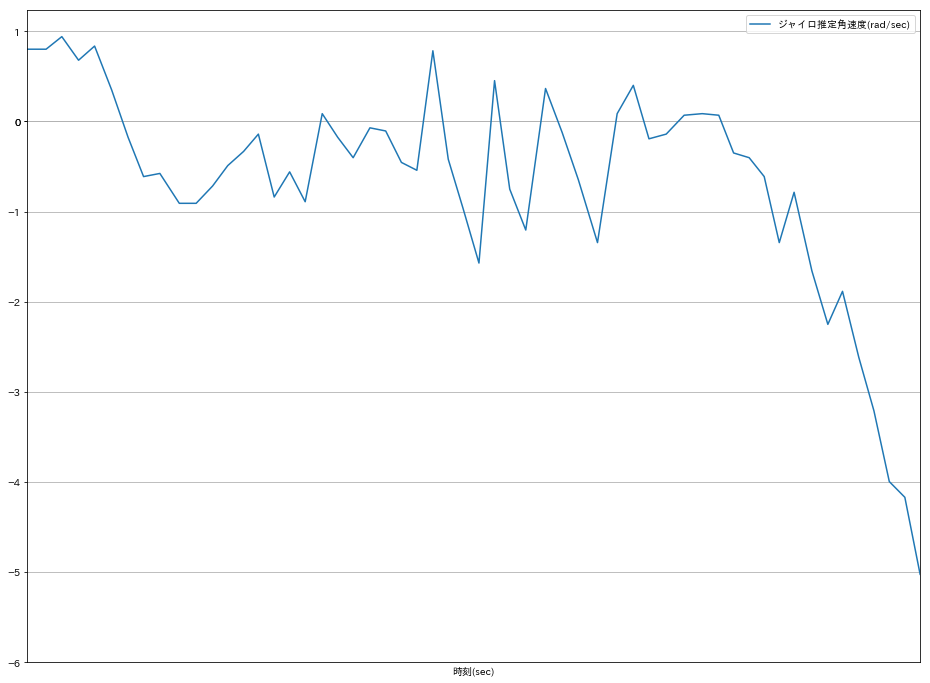

In [59]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角速度(rad/sec)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

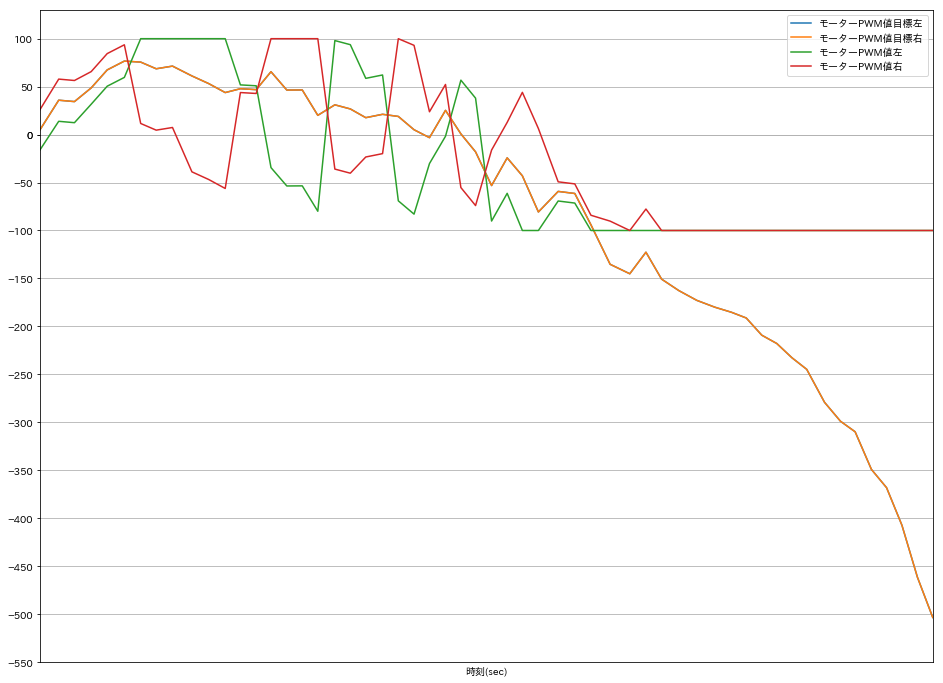

In [60]:
# =======================================================
# 印加電圧比のグラフ出力

columns_vol = [
    'モーターPWM値目標左',
    'モーターPWM値目標右',
    'モーターPWM値左',
    'モーターPWM値右'
]
show_plot(df, columns_vol, 50, figsize=(16,12)) #, start=0.1, end=0.3)

In [61]:
import matplotlib as mpl
mpl.matplotlib_fname()
mpl.get_configdir()

'/Users/yoshinori/.matplotlib'

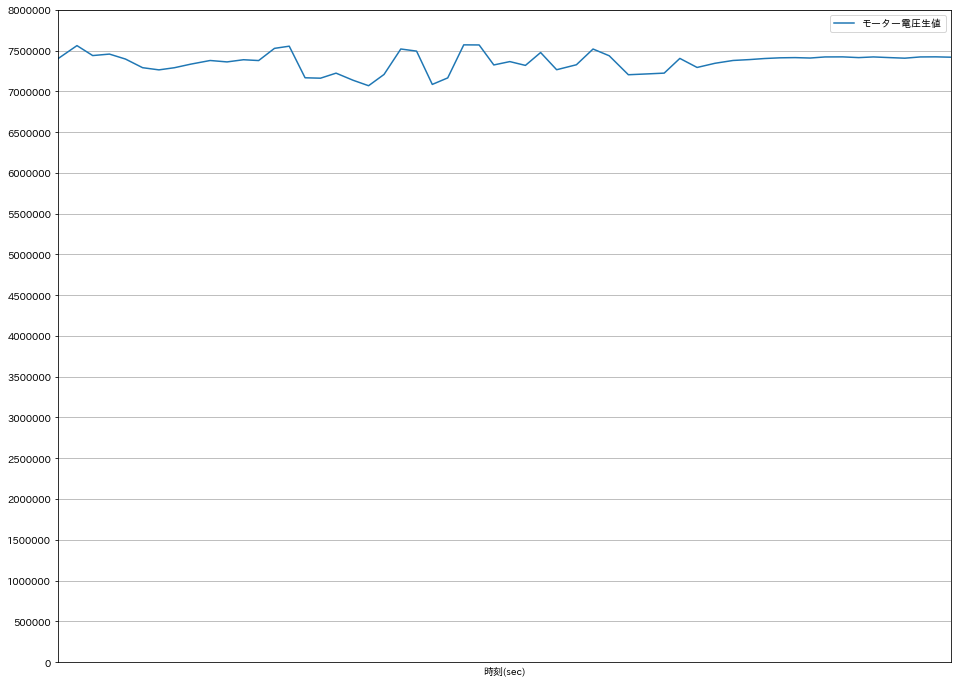

In [62]:
# =======================================================
# モーター電圧生値のグラフ出力

columns_vol = [
    'モーター電圧生値'
]
show_plot(df, columns_vol, 500000, figsize=(16,12)) #, start=0.1, end=0.3)